# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.exe", worker_id=4)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
#for i in range(5):                                         # play game for 5 episodes
    #env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    #states = env_info.vector_observations                  # get the current state (for each agent)
    #scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    #while True:
        #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        #next_states = env_info.vector_observations         # get next state (for each agent)
        #rewards = env_info.rewards                         # get reward (for each agent)
        #dones = env_info.local_done                        # see if episode finished
        #scores += env_info.rewards                         # update the score (for each agent)
        #states = next_states                               # roll over states to next time step
        #if np.any(dones):                                  # exit loop if episode finished
            #break
    #print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from collections import deque
from ddpg_agent import Agent
import torch
import time

agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=0)
agent2 = Agent(state_size=state_size, action_size=action_size, random_seed=0)
def ddpg(n_episodes=200000, max_t=10000, print_every=10):
    """DDPG training loop.
    
    Params
    ======
        n_episodes (int): maximum training episodes
        max_t (int): maximum timesteps per episode
        print_every (int): frequency of printing information
    """
    
    scores = []
    scores_deque = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent1.reset()
        agent2.reset()
        state = env_info.vector_observations            # get the current state
        score = np.zeros(num_agents)
        
        for t in range(max_t):
            action1 = agent1.act(state[0])
            action2 = agent2.act(state[1])
            action = np.concatenate((action1, action2))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            #agent.step(state, action, reward, next_state, done, True)
            agent1.step(state[0], action[0], reward[0], next_state[0], done[0], True)
            agent2.step(state[1], action[1], reward[1], next_state[1], done[1], True)
            score += reward
            state = next_state
            if np.any(done):
                break
        scores_deque.append(score)
        scores.append(score)

        print('\rEpisode {}\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
        
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.6f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
    return scores

In [8]:
scores = ddpg()

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

D:\Programming\Anaconda\envs\ML\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 10	Average Score: -0.005000
Episode 20	Average Score: -0.005000
Episode 30	Average Score: -0.003333
Episode 40	Average Score: -0.003750
Episode 50	Average Score: -0.004000
Episode 60	Average Score: -0.004167
Episode 70	Average Score: -0.004286
Episode 80	Average Score: -0.004375
Episode 90	Average Score: -0.004444
Episode 100	Average Score: -0.004500
Episode 110	Average Score: -0.004500
Episode 120	Average Score: -0.004500
Episode 130	Average Score: -0.004500
Episode 140	Average Score: -0.004500
Episode 150	Average Score: -0.003500
Episode 160	Average Score: -0.002500
Episode 170	Average Score: -0.001500
Episode 180	Average Score: 0.0015001
Episode 190	Average Score: 0.0020003
Episode 200	Average Score: 0.0020000
Episode 210	Average Score: 0.0020009
Episode 220	Average Score: 0.0020001
Episode 230	Average Score: 0.0015009
Episode 240	Average Score: 0.0015005
Episode 250	Average Score: 0.0005000
Episode 260	Average Score: -0.000500
Episode 270	Average Score: -0.001500
Episode 28

<Figure size 2000x700 with 1 Axes>

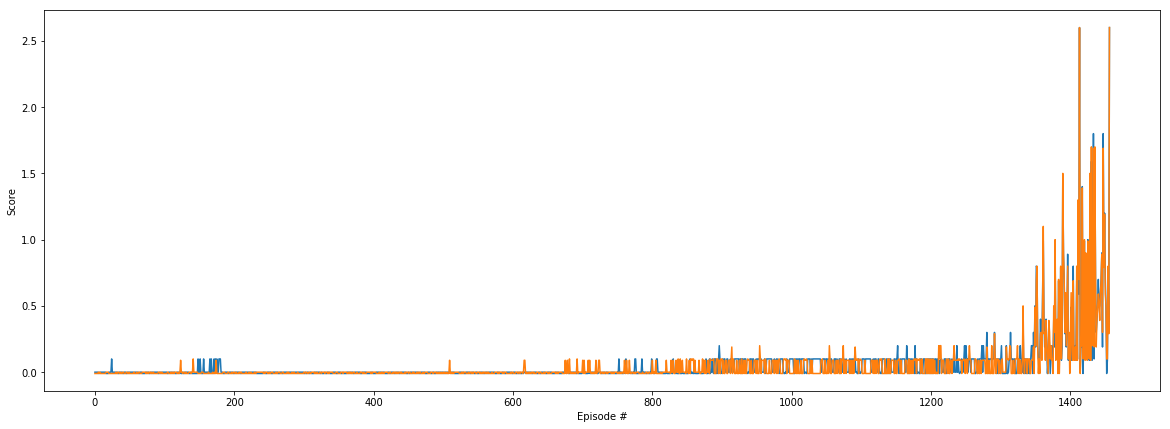

In [9]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()